In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

## Constants

In [2]:
# Change this to your location 
import variables
PATH = variables.stocks

In [3]:
# Start end date defaults
S_DATE = "2017-02-01"
E_DATE = "2022-12-06"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

## Get Stock File Names in a List

In [4]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 3263 total stocks
tickers.sort()
len(tickers)

3261

## Function that Returns a Dataframe from a CSV


In [5]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_stock_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError as ex:
        print(ex)
    else:
        return df

## Merge Multiple Stocks in One Dataframe by Column Name


In [6]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_stock_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        # if not df.index.is_unique:
        #     # Delete duplicates 
        #     df = df.loc[~df.index.duplicated(), :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

## Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight. 

$w_1r_1 + w_2r_2 = r_p$

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2$

## Plotting an Efficient Frontier


## Stock Portfolio

In [7]:
# 1ST LIST port_list = ['CALX', 'NOVT', 'BLDR', 'DXCM', 'RGEN', 'PFE', 'LLY',
# 'AMD', 'NVDA', 'NFLX', 'DAR', 'COST', 'BJ', 'WMT', 'BOOT', 'WING',
# 'LULU', 'NEE', 'AWK', 'MSCI', 'KKR', 'LPX', 'SHW', 'NXRT', 'NSA',
# 'CBRE', 'AES']

# 2ND LIST port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
# 'AMD', 'NFLX', 'COST', 'BJ', 'WING',
# 'LULU', 'NEE', 'MSCI', 'KKR', 'SHW', 'NSA',
# 'CBRE']
port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
'AMD', 'NFLX', 'COST', 'BJ', 'WING',
'MSCI', 'CBRE']
num_stocks = len(port_list)
num_stocks

11

## Merge All Data by Closing Price

In [8]:
mult_df = merge_df_by_column_name('Close',  S_DATE, 
                                  E_DATE, *port_list)
mult_df

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-02-08,6.900000,23.500000,29.090000,70.125069,13.560000,144.740005,150.527267,NaN,24.226603,87.968056,30.780001
2017-02-09,7.000000,24.000000,30.270000,69.756973,13.420000,144.139999,152.797440,NaN,24.486109,85.802345,31.570000
2017-02-10,7.400000,24.400000,30.070000,69.837784,13.580000,144.820007,153.726959,NaN,24.519596,86.647743,34.000000
2017-02-13,7.300000,24.600000,30.110001,70.289688,13.490000,143.199997,153.691208,NaN,24.310310,88.139053,34.490002
2017-02-14,7.650000,24.549999,30.350000,71.229660,13.260000,140.820007,155.183792,NaN,24.084288,89.240898,35.130001
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02,50.380001,138.919998,204.130005,250.830002,122.760002,429.480011,521.230042,60.930000,153.410004,549.830017,103.230003
2022-02-03,49.340000,134.000000,198.360001,244.809998,120.080002,405.600006,521.770020,60.910000,150.360001,540.309998,102.120003
2022-02-04,50.150002,137.470001,200.949997,242.270004,123.599998,410.170013,519.770020,59.849998,149.339996,554.710022,101.230003


## Plot Price of Investments over Total Dataset


In [9]:
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1200, width=1800, 
                  showlegend=True)
fig.show()

## Cumulative Return of all Stocks

In [10]:
mult_cum_df = merge_df_by_column_name('cum_return', S_DATE, E_DATE, *port_list)
mult_cum_df

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-09,1.014493,1.021277,1.040564,0.994751,0.989675,0.995855,1.015081,NaN,1.010712,0.975381,1.025666
2017-02-10,1.072464,1.038298,1.033689,0.995903,1.001475,1.000553,1.021257,NaN,1.012094,0.984991,1.104613
2017-02-13,1.057971,1.046809,1.035064,1.002348,0.994838,0.989360,1.021019,NaN,1.003455,1.001944,1.120533
2017-02-14,1.108696,1.044681,1.043314,1.015752,0.977876,0.972917,1.030935,NaN,0.994126,1.014469,1.141326
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02,7.301449,5.911489,7.017188,3.576895,9.053097,2.967252,3.462695,2.769545,6.332295,6.250337,3.353801
2022-02-03,7.150725,5.702128,6.818838,3.491048,8.855457,2.802266,3.466282,2.768636,6.206401,6.142116,3.317739
2022-02-04,7.268116,5.849787,6.907872,3.454827,9.115044,2.833840,3.452996,2.720454,6.164298,6.305812,3.288824


In [11]:
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1000, width=1800, 
                  showlegend=True)
fig.show()

## Mean Returns

In [12]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252
mean_ret

CALX    0.405799
NOVT    0.358622
RGEN    0.380407
LLY     0.245146
AMD     0.442498
NFLX    0.204248
COST    0.246863
BJ      0.281779
WING    0.365446
MSCI    0.361443
CBRE    0.242308
dtype: float64

## Correlation

- Want portfolio to be non-correlated - e.g. not go up at the same time and not got down at the same time
- Ideally every correlation value should be below 0.5

In [14]:
# All these assets are non-correlated
returns.corr()

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
CALX,1.000000,0.370691,0.228321,0.134060,0.258800,0.220408,0.241144,0.150427,0.249038,0.329416,0.318491
NOVT,0.370691,1.000000,0.371365,0.269066,0.415014,0.358533,0.372809,0.193653,0.331944,0.502408,0.410920
RGEN,0.228321,0.371365,1.000000,0.286401,0.378945,0.339247,0.303632,0.197661,0.279505,0.420795,0.172151
LLY,0.134060,0.269066,0.286401,1.000000,0.226173,0.221217,0.358816,0.210811,0.137059,0.313689,0.257872
AMD,0.258800,0.415014,0.378945,0.226173,1.000000,0.398968,0.319842,0.194736,0.271847,0.442496,0.295021
NFLX,0.220408,0.358533,0.339247,0.221217,0.398968,1.000000,0.348600,0.164107,0.254962,0.432273,0.193535
COST,0.241144,0.372809,0.303632,0.358816,0.319842,0.348600,1.000000,0.396790,0.239330,0.439498,0.327100
BJ,0.150427,0.193653,0.197661,0.210811,0.194736,0.164107,0.396790,1.000000,0.088389,0.166586,0.083449
WING,0.249038,0.331944,0.279505,0.137059,0.271847,0.254962,0.239330,0.088389,1.000000,0.374878,0.224614
MSCI,0.329416,0.502408,0.420795,0.313689,0.442496,0.432273,0.439498,0.166586,0.374878,1.000000,0.443202


## Generate Random Weights Equal to 1

In [19]:
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights: ', weights)
print('Total weights: ', np.sum(weights))

Weights:  [1.25356025e-01 4.55984486e-02 5.61835525e-05 5.50452030e-02
 1.12419373e-01 1.13992024e-01 1.26586038e-01 1.23909288e-01
 6.62170000e-02 1.22127013e-01 1.08693405e-01]
Total weights:  1.0


## Calculate Return of Portfolio using Random Weighting

In [20]:
np.sum(weights * returns.mean()) * 252

0.31460791298347146

## Calculate Volatility

In [21]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.2400940419798198

## Analysing Returns and Risks of 10000 Combinations 

In [22]:
p_ret = []
p_vol = []
p_SR = []
p_wt = []

for x in range(10000):
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)

    ret_1 = np.sum(p_weights * returns.mean()) * 252 
    p_ret.append(ret_1)

    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.33632116, 0.32052837, 0.29321063, ..., 0.31626905, 0.32133073,
        0.32456851]),
 array([0.25154637, 0.22674969, 0.22214648, ..., 0.24259689, 0.24129121,
        0.24090976]),
 array([1.28732194, 1.35845113, 1.26362852, ..., 1.2521556 , 1.27990871,
        1.29537511]),
 array([[0.16064142, 0.06376941, 0.12323138, ..., 0.04354619, 0.08794507,
         0.1675167 ],
        [0.06889012, 0.03706202, 0.11198412, ..., 0.10277233, 0.15479426,
         0.16780216],
        [0.03303836, 0.00745375, 0.20474641, ..., 0.03161455, 0.04112322,
         0.20104441],
        ...,
        [0.1067517 , 0.0327637 , 0.04963716, ..., 0.12685363, 0.01097772,
         0.09314591],
        [0.112871  , 0.09592769, 0.02828149, ..., 0.07371634, 0.11304328,
         0.00038114],
        [0.05459991, 0.12899079, 0.13696108, ..., 0.08806016, 0.12543911,
         0.05234879]]))

## Plotting Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

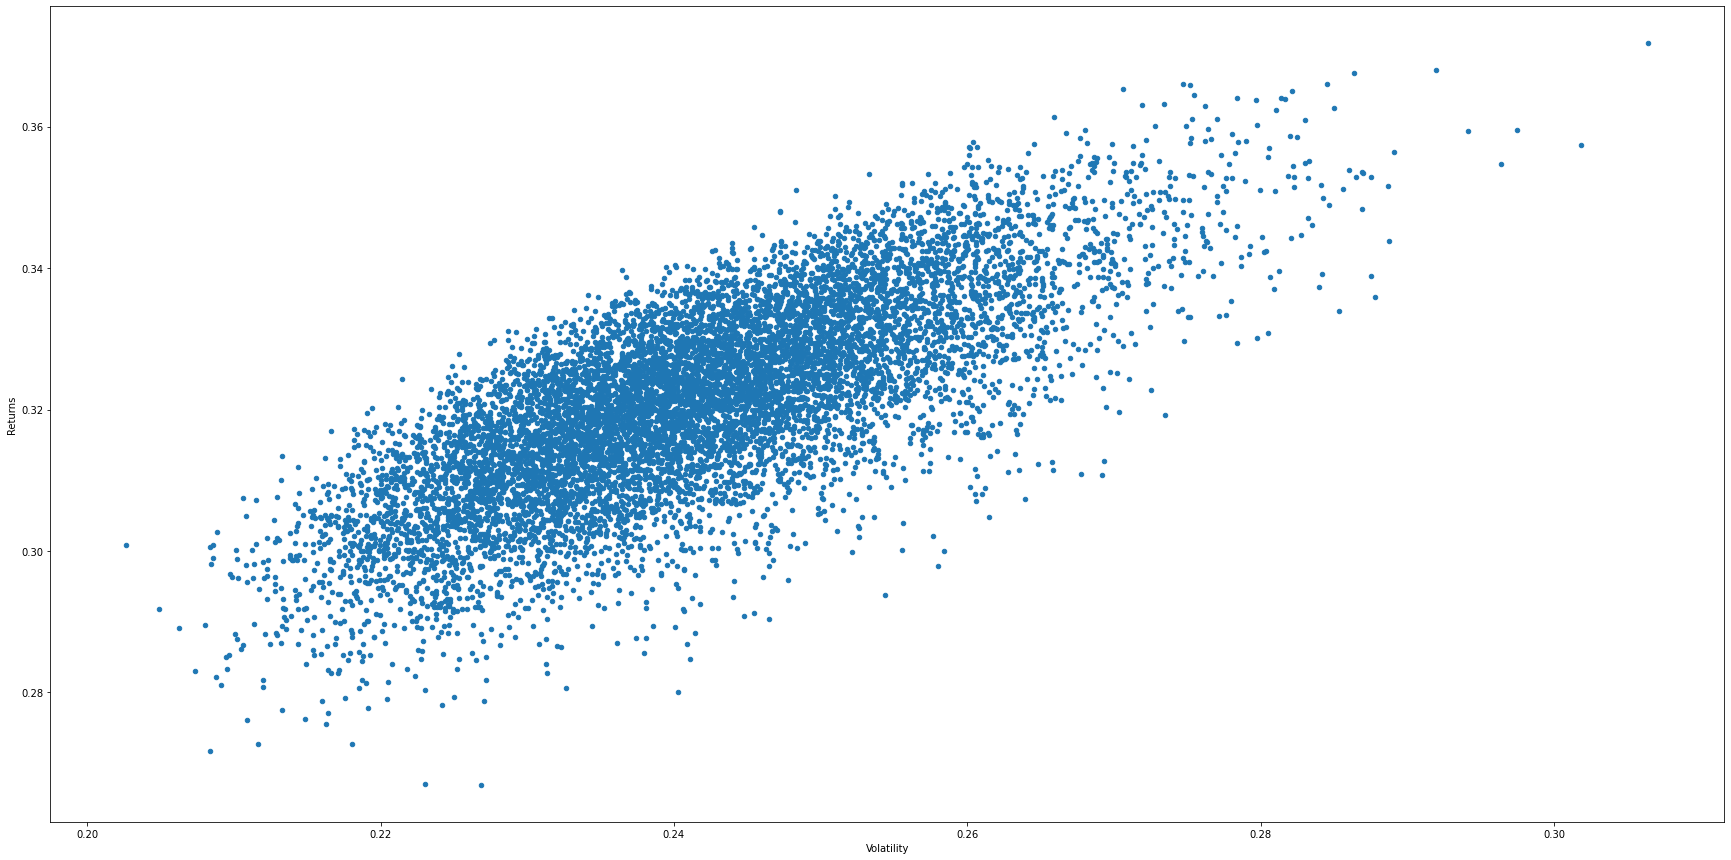

In [26]:
ports = pd.DataFrame({'Returns': p_ret, 'Volatility':p_vol})
ports.plot(x='Volatility', y='Returns', kind='scatter', figsize=(30,15))

## Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk. 

*Sharpe Ratio* = $\frac{r_i - r_f}{\sigma_i}$

$r_f = $ Risk Free Rate

$r_i = $ Rate of Return of the stock

$\sigma_i = $ Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [29]:
SR_idx = np.argmax(p_SR)

i = 0
while i < num_stocks:
    print("Stock: %s : %2.2f" %(port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1

print("\n Volatility :", p_vol[SR_idx])
print("Return: ", p_ret[SR_idx])

Stock: CALX : 6.76
Stock: NOVT : 4.77
Stock: RGEN : 1.09
Stock: LLY : 18.46
Stock: AMD : 0.89
Stock: NFLX : 0.15
Stock: COST : 32.44
Stock: BJ : 2.67
Stock: WING : 13.20
Stock: MSCI : 16.31
Stock: CBRE : 3.27

 Volatility : 0.20267325168325742
Return:  0.30087750848873357


Find percentage closest to 1 and use it as the basis for calculating all other shares
Since CBRE is .6 : CALX is 7.25 : Multiply cost of CBRE (105.64) by 7 and then divide 
that by the cost of CALX to get the shares to buy for GNRC

105.64 * 7 = 739.48 / 64.28 = 25.49 (11 Shares) * 64.28 = 707.08

In situations in which prices don't work either discard stock or force 1 share

In [30]:
def get_port_shares(one_price, force_one, wts, prices):
    num_stocks = len(wts)
    shares = []
    cost_shares = []

    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock
        max_price = one_price * wts[i]

        # Get number of shares to buy and add them to list
        num_shares = int(max_price / prices[i])
        if (force_one  & (num_shares == 0)):
            num_shares = 1

        shares.append(num_shares)
        
        # Get cost of those shares and append to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
    return shares, cost_shares

## Get Portfolio Weighting

In [32]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

## Returns the Value of Portfolio By Date

In [33]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

## Approximate Portfolio Weighting Based on Request

In [34]:
port_list = ["CALX", "NOVT", "RGEN", "LLY", "AMD", "NFLX",
"COST", "BJ", "WING", "MSCI", "CBRE"]

port_wts = [7, 8, 15, 14, 3, 3, 17, 6, 11, 14, 1]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Close',  '2022-01-07', 
                                  '2022-01-07', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(105.64, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)

Shares : [12, 5, 7, 5, 2, 1, 3, 9, 7, 2, 1]
Share Cost : [716.8800201416016, 799.5999908447266, 1447.5299530029297, 1297.5, 264.0, 541.0599975585938, 1606.1055908203125, 591.2100219726562, 1146.25, 1104.0, 104.77999877929688]
Total Investment : 9618.915573120117
Stock Weights : [0.07452815389552951, 0.08312787286325644, 0.15048785302243692, 0.13489046557658121, 0.027445921319628083, 0.05624958379617927, 0.1669736654419283, 0.06146327176680725, 0.11916623982054428, 0.11477385279117198, 0.010893119705936774]


[]